# FoML - Assignment-3
### Naitik Malav | CS19BTECH11026

### Ans 4. 

In [51]:
import numpy as np
import pandas as pd
import random
from sklearn import svm
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import csv
from sklearn.model_selection import train_test_split
import time 
import matplotlib.pyplot as plt

# Decision Tree
### code from Assignment-1

In [52]:
class DecisionTree():
    tree = {}
    
    def learn(self, data_set):
        # implement this function
        self.tree = build_decision_tree(data_set, 25)
        return self.tree 
    
def build_decision_tree(data_set, max_features=25):
    question, info_gain = best_split(data_set)

    if info_gain != 0:
        trueRows, falseRows = partitioning(data_set, question)

        #recursive call to each rows
        trueBranch = build_decision_tree(trueRows, max_features)
        falseBranch = build_decision_tree(falseRows, max_features)

        # returns a Question-Decision node
        return Decision_Node(question, trueBranch, falseBranch)

    
    # 0 information gain means it's a leaf node
    return Leaf(data_set)

def best_split(data_set):
    
    #best information gain and question of the node
    best_question = None 
    best_information_gain = 0  
    
    uncertainty = gini_index(data_set)
    
    for column in range(len(data_set[0])-1): 
        
        values = set()
        for row in data_set:
            values.add(row[column])
            
        for value in values: 
            question = Question(column, value)
            trueRows, falseRows = partitioning(data_set, question)

            if len(falseRows)==0:
                continue
            if len(trueRows)==0:
                continue

            info_gain = information_gain(trueRows, falseRows, uncertainty)

            if best_information_gain <= info_gain:
                best_information_gain = info_gain
                best_question = question

    return best_question, best_information_gain

class Question:
    def __init__(self, x, y):
        self.column, self.value = x, y

    # Compares the feature value in an example to the feature value in this question.
    def match(self, example):
        x = example[self.column]
        if isinstance(x, int) or isinstance(x, float) == True:
            return x >= self.value
        else:
            return x == self.value

    # used to print the question of the tree
    def __repr__(self):
        return utility(self)
    
def utility(Node):
    condition = "=="
    if isinstance(Node.value, int) or isinstance(Node.value, float) == True:
        condition = ">="
    return "Is %s %s %s?" % (header[Node.column], condition, str(Node.value))


def partitioning(data_set, question):
    trueRows = []
    falseRows = []
    
    for row in data_set:
        if question.match(row)==False:
            falseRows.append(row)
        else:
            trueRows.append(row)
    return trueRows, falseRows

class Decision_Node:
    def __init__(self, question, trueBranch, falseBranch):
        self.question, self.true, self.false = question, trueBranch, falseBranch
        
def information_gain(left, right, current):
    
    p = float(len(left)) / (len(left) + len(right))
    return current - (p*gini_index(left) + (1-p)*gini_index(right))

def gini_index(data_set):
    labels = Label_Count(data_set)
    impurity = 1
    for label in labels:
        probability = labels[label]/float(len(data_set))
        impurity = impurity - (probability*probability)
    return impurity

def classify(instance, Node):
    #Leaf Node
    if isinstance(Node, Leaf):
        return Node.predictions

    #recursive call to 'true' side and 'false' side
    if Node.question.match(instance):
        return classify(instance, Node.true)
    else:
        return classify(instance, Node.false)
    
class Leaf:
    
    def __init__(self, rows):
        self.predictions = Label_Count(rows)
        
def Label_Count(rows):
    counts = {}  # a dictionary of label -> count.
    for row in rows:
        # in our dataset the label is always the last column
        label = row[-1]
        if label not in counts:
            counts[label] = 0
        counts[label] += 1
    return counts

def accuracy(d_tree, test_set):

    results = []    
    for instance in test_set:
        result = list((classify(instance[:-1], d_tree)).keys())[0]    #stores the count of (total positive + total negative)
        results.append( result == instance[-1])
        
    accuracy = float(results.count(True))/float(len(results))
    return accuracy

In [53]:
url = "https://web.stanford.edu/~hastie/ElemStatLearn//datasets/spam.data"
df = pd.read_csv(url, sep = ' ', header=None)

In [54]:
df

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [55]:
random.seed(0)
train_df, test_df = train_test_split(df, test_size=0.3)
outofbag = []

In [56]:
def bootstrapping(train_df, n_bootstrap):
    bootstrap_indices = np.random.randint(low=0, high=len(train_df), size=n_bootstrap)
    
    df_bootstrapped = train_df.iloc[bootstrap_indices]
    
    oob_indices = set(train_df.index) - set(np.unique(bootstrap_indices))
    oob_indices = list(oob_indices)
    
    df_bootstrapped = train_df.iloc[bootstrap_indices]
    
    return df_bootstrapped

def random_forest_algorithm(train_df, n_trees, n_bootstrap, max_features=25):
    forest = []
    for i in range(n_trees):
        df_bootstrapped= bootstrapping(train_df, n_bootstrap)
        df_bootstrapped = pd.DataFrame(df_bootstrapped).to_numpy()
        tree = build_decision_tree(df_bootstrapped, max_features=25)
        forest.append(tree)
        
    return forest

# Random Forest
### Average accuracy and time taken

In [57]:
start = time.time()
forest = random_forest_algorithm(train_df, n_trees=10, n_bootstrap=len(train_df), max_features=25)
end = time.time()

#Calculating Accuracy
test_df = pd.DataFrame(test_df).to_numpy()
accuracies = []
for tree in forest:
    accuracies.append(accuracy(tree, test_df))
    
print("Average Accuracy is: ", sum(accuracies)/len(accuracies))
print("Time Taken by Random Forest Algorithm:", end-start)

KeyboardInterrupt: 

# 4b, 4c - Random Forest Using Sklearn and Graph

Time Taken for m= 10 is:  0.2340681552886963
Time Taken for m= 15 is:  0.4071030616760254
Time Taken for m= 20 is:  0.5581247806549072
Time Taken for m= 25 is:  0.7571892738342285
Time Taken for m= 30 is:  0.7861940860748291
Time Taken for m= 35 is:  0.9782745838165283
Time Taken for m= 50 is:  1.4513952732086182
Time Taken for m= 55 is:  1.407297134399414
Average Accuracy is:  0.9465966690803767


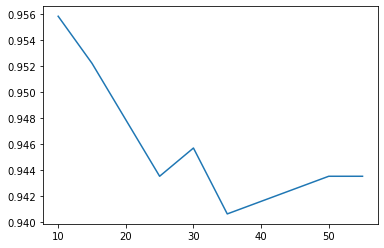

In [60]:
X = df.iloc[:,:-1]
Y = df.iloc[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

M=[10, 15, 20, 25, 30, 35, 50, 55]
accuracy = []

for m in M:
    start = time.time()
    clf = RandomForestClassifier(n_estimators=25, max_features=m)
    clf.fit(X_train, Y_train)
    end = time.time()

    Y_pred = clf.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test, Y_pred))
    print("Time Taken for m=",m,"is: ", end-start)
    
print("Average Accuracy is: ", sum(accuracy)/len(accuracy))
plt.plot(M, accuracy)
plt.show()